# Exercise 1: House price levels and dispersion

For this exercise, we're using data on around 3,000 observations of house prices and house characteristics from Ames, a small city in Iowa.

1.  Load the Ames housing data set from `ames_houses.csv` located in the `data/` folder.

    To familiarize yourself with the data, report the columns present in the DataFrame and 
    then restrict the data to the columns `SalePrice` (price in thousands of US dollars) 
    and `Neighborhood` (abbreviated name of the neighborhood).
    
    Check that there are no observations with missing values in the final data set.

2.  Compute the average house price (column `SalePrice`) by neighborhood (column `Neighborhood`). List the three most expensive neighborhoods, for example by using [`sort_values()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html).

    Create a bar chart showing the average sale price for all neighborhoods in descending order.

    *Hint:* You can create the bar chart by either using pandas's 
    [`DataFrame.plot.bar()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html)
    or Matplotlib's
    [`bar()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html).

3.  You want to quantify the price dispersion in each neighborhood. To this end, compute the standard deviation of the sale price by neighborhood using 
    [`std()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.std.html). Which are the three neighborhoods with the most dispersed prices?

4.  Create a scatter plot with the average house price on the $x$-axis and the standard deviation on the $y$-axis.
    Is there a relationship between the average house prices and their dispersion within neighborhood?

    *Hint:* You can create the scatter plot by either using pandas's 
    [`DataFrame.plot.scatter()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.scatter.html)
    or Matplotlib's 
    [`scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html).

In [ ]:
import pandas as pd
datapath = "../../data/ames_houses.csv"
df = pd.read_csv(datapath)
df # shows that it is 16 columns



,LotArea,Neighborhood,OverallQuality,OverallCondition,YearBuilt,YearRemodeled,BuildingType,CentralAir,LivingArea,Bathrooms,Bedrooms,Fireplaces,SalePrice,YearSold,MonthSold,HasGarage
0,2951.2,NAmes,6,5,1960,1960,Single-family,Y,153.8,1,3,2,215.0,2010,5,1
1,1079.6,NAmes,5,6,1961,1961,Single-family,Y,83.2,1,2,0,105.0,2010,6,1
2,1325.3,NAmes,6,6,1958,1958,Single-family,Y,123.5,1,3,0,172.0,2010,6,1
3,1036.7,NAmes,7,5,1968,1968,Single-family,Y,196.0,2,3,2,244.0,2010,4,1
4,1284.7,Gilbert,5,5,1997,1998,Single-family,Y,151.3,2,3,1,189.9,2010,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,737.3,Mitchel,6,6,1984,1984,Single-family,Y,93.2,1,3,0,142.5,2006,3,1
2926,825.4,Mitchel,5,5,1983,1983,Single-family,Y,83.8,1,2,0,131.0,2006,6,1
2927,969.9,Mitchel,5,5,1992,1992,Single-family,Y,90.1,1,3,0,132.0,2006,7,0
2928,929.9,Mitchel,5,5,1974,1975,Single-family,Y,129.0,1,2,1,170.0,2006,4,1


In [ ]:
#restrict the columns to salesprice and neighborhood
df = df[["SalePrice","Neighborhood"]]

#chech if there are any missing observations
df.isna().sum() #checks all columns for missing values



SalePrice       0
Neighborhood    0
dtype: int64

In [50]:
#average housing price by neigborhood
df.groupby("Neighborhood")["SalePrice"].mean()
sales_group = df.groupby("Neighborhood")["SalePrice"].mean().sort_values(ascending=False) #sorting from most expensive to least
df.groupby("Neighborhood")["SalePrice"].mean().sort_values(ascending=False).head(3).round(1) #listing the 3 most expensive and rounding to 1 decimal

Neighborhood
NoRidge    330.3
StoneBr    324.2
NridgHt    322.0
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'Average house price by neighborhood')

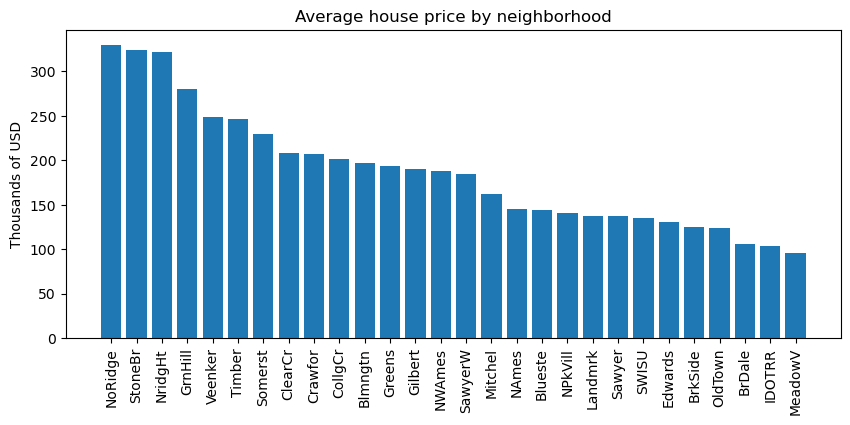

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4)) #has to be above plt.bar
plt.bar(sales_group.index, sales_group.values)
# Rotate x-axis labels by 90 degrees to avoid overlap
plt.tick_params(axis="x", rotation=90)
plt.ylabel("Thousands of USD")
plt.title("Average house price by neighborhood")

In [53]:
#dispare prices: caluclate standard deviation in each neighborhood
df.groupby("Neighborhood")["SalePrice"].std().sort_values(ascending=False)
df.groupby("Neighborhood")["SalePrice"].std().sort_values(ascending=False).head(3).round(1) #the 3 with highest deviations in prices


Neighborhood
StoneBr    119.3
NoRidge    101.4
NridgHt     95.9
Name: SalePrice, dtype: float64

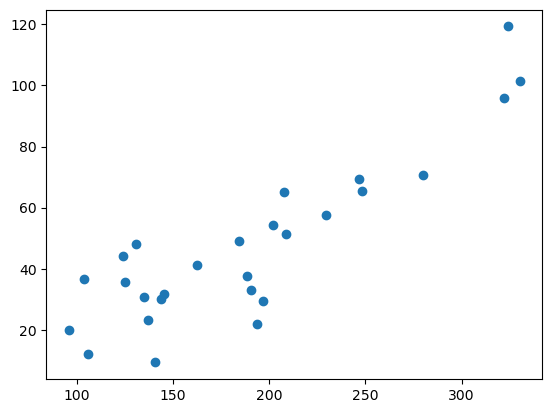

In [ ]:
#my way (not preffered)
#scatterplot with avg house price as x-values and standard deviation as y-values
avg_houseprice = df.groupby("Neighborhood")["SalePrice"].mean()
standard_deviation = df.groupby("Neighborhood")["SalePrice"].std()
plt.scatter(avg_houseprice,standard_deviation)


<Axes: title={'center': 'Average house price vs. standard deviation by neighborhood'}, xlabel='Average house price (thousand USD)', ylabel='Standard deviation (thousand USD)'>

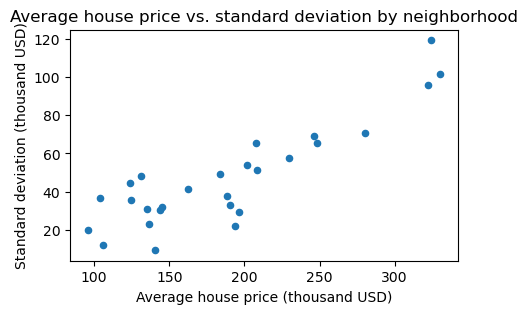

In [ ]:
#richards way: (better)
group = df.groupby("Neighborhood")["SalePrice"].agg(["mean","std"])

group.plot.scatter(x="mean",
                   y="std",
                   title="Average house price vs. standard deviation by neighborhood",
                   xlabel="Average house price (thousand USD)",
                   ylabel="Standard deviation (thousand USD)",
                   figsize=(5, 3)
              )


***
# Exercise 2: Determinants of house prices

For this exercise, we're using data on around 3,000 observations of house prices and house characteristics from Ames, a small city in Iowa,
to understand how house prices vary with selected house characteristics.

1.  Load the Ames housing data set from `ames_houses.csv` located in the `data/` folder.

    Keep only the columns `SalePrice` (price in thousands of US dollars), `LotArea` (lot area in m²), `YearBuilt`, and `Bedrooms` (number of bedrooms).

    Restrict your data set to houses with one or more bedrooms and a lot area of at least 100m².

2.  Compute the average year in which a house was built (using the column `YearBuilt`). 

    Create a new column `New` which takes on the value of 1 if the house was built 
    after the average year of construction in the sample (_"new"_), and 0 otherwise (_"old"_). 

    What is the average year of construction within these two categories?

3.  Create a new column `Rooms` which categorizes the number of `Bedrooms` into three groups: 1, 2, and 3 or more. You can create these categories using boolean indexing, [`np.where()`](https://numpy.org/doc/2.0/reference/generated/numpy.where.html), pandas's [`where()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.where.html), or some other way.

4.  Compute the mean sale price within each group formed by `New` and `Rooms` (for a total of 6 different categories).

    What is the average price difference between an old house with 1 bedroom and a new house with 3+ bedrooms?

5.  Create a figure with two subplots arranged in two columns. The left column should contain a bar chart showing
    the average house price by the number of bed rooms (1, 2, 3+) for _old_ houses, whereas the 
    right column should show the corresponding bars for _new_ houses.

In [ ]:
import pandas as pd
datapath = "../../data/ames_houses.csv"
df = pd.read_csv(datapath)
df = df[["SalePrice","LotArea","YearBuilt","Bedrooms"]] #keep only these columns
df = df.query("Bedrooms>=1 & LotArea>=100") #only keep the rows with these conditions met
df["YearBuilt"].mean() 


np.float64(1971.3302532511977)

In [79]:
#creating a new column where 1 equals build after the avg constucion year and 0 if before
df["New"] = df["YearBuilt"] > df["YearBuilt"].mean() #creates a new column where if it is build after the mean it is True
df["New"] = df["New"].astype(int) #turns True into 1 and False into 0
df


,SalePrice,LotArea,YearBuilt,Bedrooms,New
0,215.0,2951.2,1960,3,0
1,105.0,1079.6,1961,2,0
2,172.0,1325.3,1958,3,0
3,244.0,1036.7,1968,3,0
4,189.9,1284.7,1997,3,1
...,...,...,...,...,...
2925,142.5,737.3,1984,3,1
2926,131.0,825.4,1983,2,1
2927,132.0,969.9,1992,3,1
2928,170.0,929.9,1974,2,1


In [ ]:
#finds the avrage time houses after and before the mean are built
df.groupby("New")["YearBuilt"].mean()

New
0    1945.149148
1    1995.678336
Name: YearBuilt, dtype: float64

In [ ]:
#New column Rooms, depending on 1, 2 or "3 or more rooms"
#where()

df["Rooms"] = df["Bedrooms"].where(df["Bedrooms"]<= 2,"3 or more") #where(condition, other), meaning keep nubers as long as bedrooms <= 2 ..
#.. if not replace it with "3 or more"
df.query("Bedrooms ==2")

,SalePrice,LotArea,YearBuilt,Bedrooms,New,Rooms
1,105.0,1079.6,1961,2,0,2
6,213.5,457.0,2001,2,1,2
7,191.5,464.9,1992,2,1,2
8,236.5,500.6,1995,2,1,2
13,171.5,945.3,1990,2,1,2
...,...,...,...,...,...,...
2904,215.0,652.1,1997,2,1,2
2905,164.0,418.0,1998,2,1,2
2906,153.5,418.0,1998,2,1,2
2926,131.0,825.4,1983,2,1,2


In [103]:
#mean sales price by new and rooms (6 different categories)
mean_prices = df.groupby(["New", "Rooms"])["SalePrice"].mean()
mean_prices

New  Rooms    
0    1            101.417949
     2            117.512113
     3 or more    146.528135
1    1            226.610959
     2            210.975211
     3 or more    223.989411
Name: SalePrice, dtype: float64

In [ ]:
#avg price difference between old house with 1 bedroom and new house with "3 or more"
diff = mean_prices.loc[1, "3 or more"] - mean_prices.loc[0, 1] # extracting 1 from colunm "New" and then "3 or more"
diff


np.float64(122.5714619634509)

***
# Exercise 3: Inflation and unemployment in the US

In this exercise, you'll be working with selected macroeconomic variables for the United States reported at monthly frequency obtained from [FRED](https://fred.stlouisfed.org/).
The data set starts in 1948 and contains observations for a total of 864 months.

1.  Load the data from the file `FRED_monthly.csv` located in the `data/FRED` folder. Print the first 10 observations to get an idea how the data looks like.
    
    Keep only the columns `Year`, `Month`, `CPI`, and `UNRATE`. Moreover, perform this analysis only on observations prior to 1970 and drop the rest.

2.  The column `CPI` stores the consumer price index (CPI) for the US. You may be more familiar with the concept of inflation, which is the percent change of the CPI relative to the previous period. 
    Create a new column `Inflation` which contains the _annual_ inflation _in percent_ relative to the same month in the previous year by applying 
    [`pct_change()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.pct_change.html) to the column `CPI`.

    *Hints:* 
    
    -   Since this is monthly data, you need to pass the argument `periods=12` to `pct_change()` to get annual percent changes.
    -   You need to multiply the values returned by `pct_change()` by 100 to get percent values.

3.  Compute the average unemployment rate (column `UNRATE`) over the whole sample period. Create a new column `UNRATE_HIGH` that contains an indicator whenever the unemployment rate is above its average value (_"high unemployment period"_). 
    -   How many observations fall into the high- and the low-unemployment periods?
    -   What is the average unemployment rate in the high- and low-unemployment periods?

4.  Compute the average inflation rate for high- and low-unemployment periods. Is there any difference?

    Visualize this relationship by creating a scatter plot with the unemployment rate on the $x$-axis and inflation on the $y$-axis, and assign different colors 
    to observations from the low and high unemployment periods.

5.  Use [`resample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) to aggregate
    the inflation data to annual frequency and compute the average inflation within each calendar year.

    -   Report the three years with the highest inflation rates.
    -   Create a plot that shows the average annual inflation over the sample period.

    *Hint:* Use the resampling rule `'YE'` when calling `resample()`.


In [197]:
filepath = "../../data/FRED/FRED_monthly.csv"
df = pd.read_csv(filepath)

df = df[["Year","Month","CPI","UNRATE"]] #keeping only these columns
df = df.query("Year < 1970") #drops all rows after 1970
df

,Year,Month,CPI,UNRATE
0,1948,1,23.7,3.4
1,1948,2,23.7,3.8
2,1948,3,23.5,4.0
3,1948,4,23.8,3.9
4,1948,5,24.0,3.5
...,...,...,...,...
259,1969,8,36.9,3.5
260,1969,9,37.1,3.7
261,1969,10,37.3,3.7
262,1969,11,37.5,3.5


In [201]:
#creating a new column inflation and caltulating it by comparing the same month the previous year

df["Inflation"] = (df["CPI"].pct_change(periods=12)*100).round(1) #compares CPI with CPI 12 months earlier
df

,Month,CPI,UNRATE,Inflation
Year,,,,
1948,1,23.7,3.4,NaN
1948,2,23.7,3.8,NaN
1948,3,23.5,4.0,NaN
1948,4,23.8,3.9,NaN
1948,5,24.0,3.5,NaN
...,...,...,...,...
1969,8,36.9,3.5,5.4
1969,9,37.1,3.7,5.7
1969,10,37.3,3.7,5.7


Compute the average unemployment rate (column `UNRATE`) over the whole sample period. Create a new column `UNRATE_HIGH` that contains an indicator whenever the unemployment rate is above its average value (_"high unemployment period"_). 
    -   How many observations fall into the high- and the low-unemployment periods?
    -   What is the average unemployment rate in the high- and low-unemployment periods?

In [202]:
df["UNRATE_HIGH"] = mean_unrate < df["UNRATE"] #create new colum where if UNRATE is higher than mean_unrate it is displayed as True
df["UNRATE_HIGH"] = df["UNRATE_HIGH"].astype(int) #1 for over and 0 for under
df["UNRATE_HIGH"].value_counts() #141 for below and 123 above mean
df.groupby("UNRATE_HIGH")["UNRATE"].mean() #average UNRATE in high and low UNRATE periods

UNRATE_HIGH
0    3.697872
1    5.781301
Name: UNRATE, dtype: float64

In [203]:
#average inflation rate for high and low -unemployment periods
df.groupby("UNRATE_HIGH")["Inflation"].mean() 
print("The inflation is much lower with high unemployment") #when unemployment is high, demand is weak and prices dont rise so much
#when unemployment is low, demand is strong and prices rise.

The inflation is much lower with high unemployment


Text(0.5, 1.0, 'Unemployment vs. Inflation in the US')

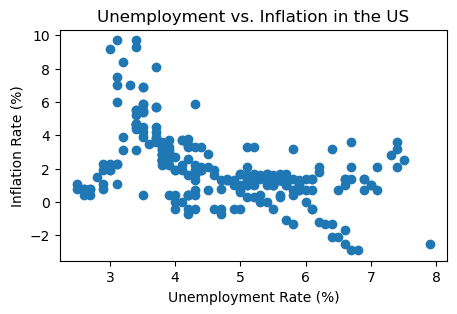

In [ ]:
#did not know how to do with two different colors
#scatter plot: x:unrate, y:inflation, different colors for observations in high and low unrate periods
plt.figure(figsize=(5, 3))  # set figure size first
plt.scatter(df["UNRATE"], df["Inflation"])
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Inflation Rate (%)")
plt.title("Unemployment vs. Inflation in the US")

Text(0.5, 1.0, 'Inflation vs. unemployment rate')

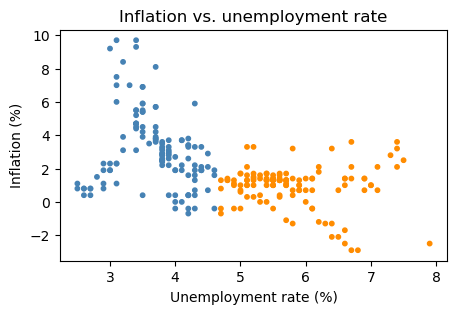

In [ ]:
#Richards way:
# Colors for low- and high-unemployment periods
colors = np.array(['steelblue', 'darkorange'])

plt.figure(figsize=(5, 3))

# Specify colors based on the UNRATE_HIGH indicator
plt.scatter(df["UNRATE"], df["Inflation"], color=colors[df["UNRATE_HIGH"].astype(int)], s=10)
plt.xlabel("Unemployment rate (%)")
plt.ylabel("Inflation (%)")
plt.title("Inflation vs. unemployment rate")

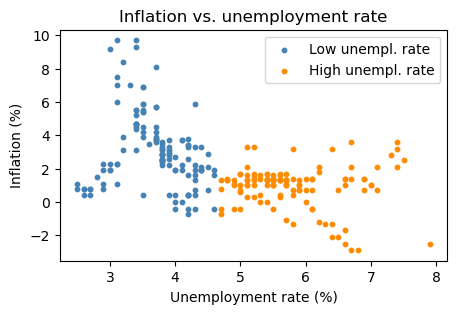

In [157]:
#or manually with two different plots in one figure
import matplotlib.pyplot as plt

df_hi = df.loc[df["UNRATE_HIGH"] == 1]
df_lo = df.loc[df["UNRATE_HIGH"] == 0]

plt.figure(figsize=(5, 3))
plt.scatter(df_lo["UNRATE"], df_lo["Inflation"], label="Low unempl. rate", color="steelblue", s=10)
plt.scatter(df_hi["UNRATE"], df_hi["Inflation"], label="High unempl. rate", color="darkorange", s=10)
plt.xlabel("Unemployment rate (%)")
plt.ylabel("Inflation (%)")
plt.title("Inflation vs. unemployment rate")
plt.legend()

5.  Use [`resample()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html) to aggregate
    the inflation data to annual frequency and compute the average inflation within each calendar year.

    -   Report the three years with the highest inflation rates.
    -   Create a plot that shows the average annual inflation over the sample period.

    *Hint:* Use the resampling rule `'YE'` when calling `resample()`.

In [ ]:
#set year as index
df = df.set_index("Year")


In [ ]:
# Compute average inflation in each year
infl_avg = df.groupby("Year")["Inflation"].mean()
# Sort in descending order and print the three years with highest average inflation
infl_avg.sort_values(ascending=False).head(3)


Year
1951    7.975000
1969    5.425000
1968    4.225000
1957    3.408333
1966    3.000000
1967    2.766667
1958    2.691667
1952    2.275000
1965    1.625000
1960    1.508333
Name: Inflation, dtype: float64

Text(0.5, 1.0, 'Average annual inflation')

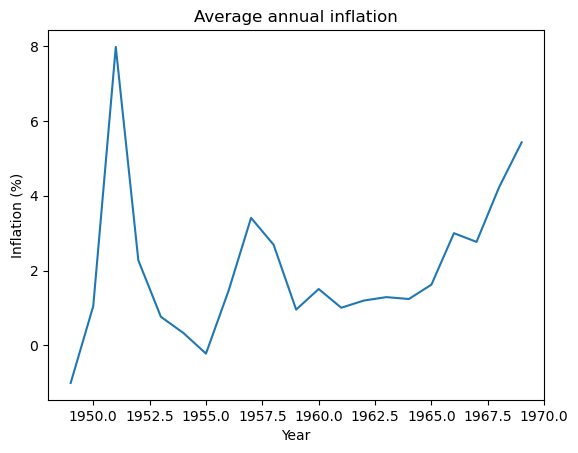

In [209]:
plt.plot(infl_avg.index,infl_avg.values)
plt.xlabel("Year")
plt.ylabel("Inflation (%)")
plt.title("Average annual inflation")

